## Load Some Images

In [3]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
from glob import glob

In [4]:
image_files = glob('data/random/*')

images = [Image.open(f) for f in image_files]

## Load Pre-trained Squeezenet

In [5]:
import torchvision
import torchvision.models as models

In [6]:
squeezenet1_0 = torchvision.models.squeezenet1_0(pretrained=True, progress=True)
squeezenet1_0.to('cuda')

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [7]:
# it looks like the only interesting dropout layer above is classifier:0, so we want to agument on classifier:1

squeezenet1_0.classifier[1]

Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))

## Do Augmentation

In [8]:
import dropviz
import matplotlib.pyplot as plt

In [9]:
# turn of ticks because we are only plotting images
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

In [10]:
#  https://pytorch.org/hub/pytorch_vision_alexnet/
  
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [11]:
# utilities for converting the normalized images into displayable ones

def denorm(image):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * std
    image = image + mean
    return image

def fix_image(image):
    if torch.is_tensor(image):
        image = image.numpy()
    image = image.reshape(3, 224, 224)
    image = image.transpose(1, 2, 0)
    image = denorm(image)
    return image

Epoch 1, loss 107.6190185546875
Epoch 1001, loss 70.21803283691406
Epoch 2001, loss 64.9577865600586
Epoch 3001, loss 61.56586837768555
Epoch 4001, loss 58.91257095336914


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 56.88456726074219


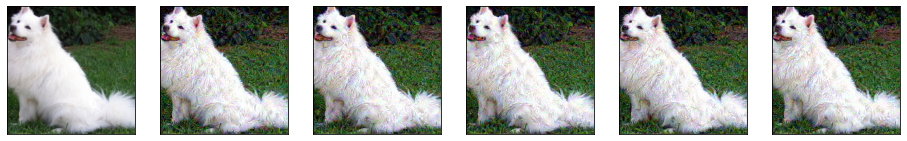

Epoch 1, loss 101.88337707519531
Epoch 1001, loss 72.16586303710938
Epoch 2001, loss 66.8547134399414
Epoch 3001, loss 63.79104995727539
Epoch 4001, loss 61.17647933959961


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 59.027496337890625


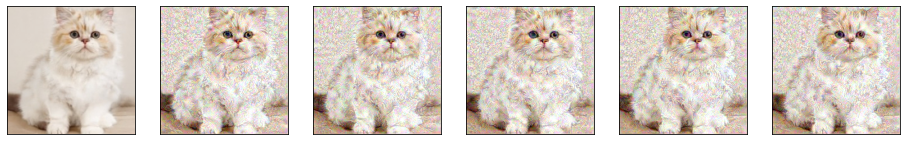

Epoch 1, loss 55.40970230102539
Epoch 1001, loss 36.23148727416992
Epoch 2001, loss 32.671180725097656
Epoch 3001, loss 30.528606414794922
Epoch 4001, loss 28.85647964477539


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 27.446056365966797


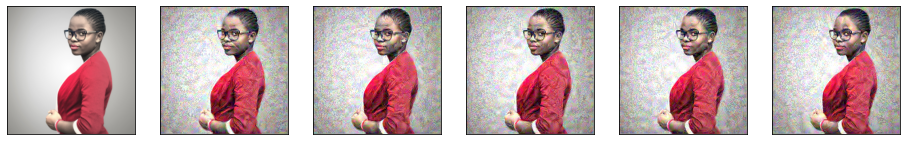

Epoch 1, loss 79.39244842529297
Epoch 1001, loss 50.9232063293457
Epoch 2001, loss 45.8885383605957
Epoch 3001, loss 42.65095520019531
Epoch 4001, loss 40.26275634765625


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 38.26877212524414


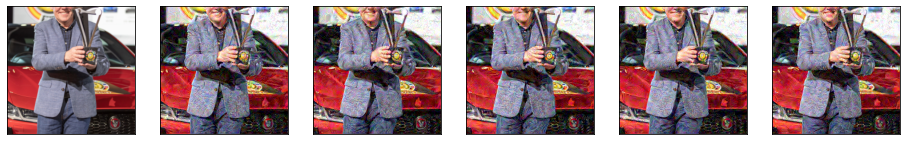

In [13]:
for image in images:
    
    # preprocess input
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    
    # augment
    corrupted_images, output = dropviz.augment(squeezenet1_0, squeezenet1_0.classifier[1], 'cuda', input_batch, 
                                               5, 5000, 0.01, 0.0001, verbosity=1)

    # plot
    fig, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))

    ax[0].imshow(fix_image(input_batch))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(fix_image(corrupted_images[n]))
    plt.show()